In [1]:
# Initial Imports
import os
import datetime as dt
import numpy as np
import pandas as pd
from pathlib import Path
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Create Yahoo Finance Ticker Objects
aapl = yf.Ticker("AAPL")
msft = yf.Ticker("MSFT")
amzn = yf.Ticker("AMZN")
uber = yf.Ticker("UBER")

In [3]:
# Pull Full Price History
aapl_hist = aapl.history(period="max")
msft_hist = msft.history(period="max")
amzn_hist = amzn.history(period="max")
uber_hist = uber.history(period="max")

In [4]:
# Save Price History to CSV
aapl_hist.to_csv('./aapl_hist.csv')
msft_hist.to_csv('./msft_hist.csv')
amzn_hist.to_csv('./amzn_hist.csv')
uber_hist.to_csv('./uber_hist.csv')

In [5]:
# Drop Unnecessary Columns 
aapl_hist.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
msft_hist.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
amzn_hist.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
uber_hist.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)

In [6]:
# 30-Day Rolling Standard Deviation
aapl_hist['30-Day Rolling STD'] = aapl_hist['Close'].rolling(window=30).std()
msft_hist['30-Day Rolling STD'] = msft_hist['Close'].rolling(window=30).std()
amzn_hist['30-Day Rolling STD'] = amzn_hist['Close'].rolling(window=30).std()
uber_hist['30-Day Rolling STD'] = uber_hist['Close'].rolling(window=30).std()

In [7]:
# 30-Day Rolling Simple Moving Average
aapl_hist['30-Day Rolling SMA'] = aapl_hist['Close'].rolling(window=30).mean()
msft_hist['30-Day Rolling SMA'] = msft_hist['Close'].rolling(window=30).mean()
amzn_hist['30-Day Rolling SMA'] = amzn_hist['Close'].rolling(window=30).mean()
uber_hist['30-Day Rolling SMA'] = uber_hist['Close'].rolling(window=30).mean()

In [8]:
# 30-Day Rolling Exponentially Weighted Moving Average
aapl_hist['30-Day Rolling EWMA'] = aapl_hist['Close'].ewm(halflife=30).mean()
msft_hist['30-Day Rolling EWMA'] = msft_hist['Close'].ewm(halflife=30).mean()
amzn_hist['30-Day Rolling EWMA'] = amzn_hist['Close'].ewm(halflife=30).mean()
uber_hist['30-Day Rolling EWMA'] = uber_hist['Close'].ewm(halflife=30).mean()

In [9]:
# Calculate Relative Strength Index
aapl_delta = aapl_hist['Close'].diff()
aapl_up = aapl_delta.clip(lower=0)
aapl_down = aapl_delta.clip(upper=0) * -1
aapl_ema_up = aapl_up.ewm(com=13, adjust=False).mean()
aapl_ema_down = aapl_down.ewm(com=13, adjust=False).mean()
aapl_rs = aapl_ema_up / aapl_ema_down
aapl_hist['RSI'] = 100 - (100/(1 + aapl_rs))

msft_delta = msft_hist['Close'].diff()
msft_up = msft_delta.clip(lower=0)
msft_down = msft_delta.clip(upper=0) * -1
msft_ema_up = msft_up.ewm(com=13, adjust=False).mean()
msft_ema_down = msft_down.ewm(com=13, adjust=False).mean()
msft_rs = msft_ema_up / msft_ema_down
msft_hist['RSI'] = 100 - (100/(1 + msft_rs))

amzn_delta = amzn_hist['Close'].diff()
amzn_up = amzn_delta.clip(lower=0)
amzn_down = amzn_delta.clip(upper=0) * -1
amzn_ema_up = amzn_up.ewm(com=13, adjust=False).mean()
amzn_ema_down = amzn_down.ewm(com=13, adjust=False).mean()
amzn_rs = amzn_ema_up / amzn_ema_down
amzn_hist['RSI'] = 100 - (100/(1 + amzn_rs))

uber_delta = uber_hist['Close'].diff()
uber_up = uber_delta.clip(lower=0)
uber_down = uber_delta.clip(upper=0) * -1
uber_ema_up = uber_up.ewm(com=13, adjust=False).mean()
uber_ema_down = uber_down.ewm(com=13, adjust=False).mean()
uber_rs = uber_ema_up / uber_ema_down
uber_hist['RSI'] = 100 - (100/(1 + uber_rs))

In [10]:
# Calculate MACD
aapl_ewm12 = aapl_hist['Close'].ewm(span=12, adjust=False).mean()
aapl_ewm26 = aapl_hist['Close'].ewm(span=26, adjust=False).mean()
aapl_hist['MACD'] = aapl_ewm12 - aapl_ewm26

msft_ewm12 = msft_hist['Close'].ewm(span=12, adjust=False).mean()
msft_ewm26 = msft_hist['Close'].ewm(span=26, adjust=False).mean()
msft_hist['MACD'] = msft_ewm12 - msft_ewm26

amzn_ewm12 = amzn_hist['Close'].ewm(span=12, adjust=False).mean()
amzn_ewm26 = amzn_hist['Close'].ewm(span=26, adjust=False).mean()
amzn_hist['MACD'] = amzn_ewm12 - amzn_ewm26

uber_ewm12 = uber_hist['Close'].ewm(span=12, adjust=False).mean()
uber_ewm26 = uber_hist['Close'].ewm(span=26, adjust=False).mean()
uber_hist['MACD'] = uber_ewm12 - uber_ewm26

In [11]:
# Take Data from Past Year
aapl_1Y = aapl_hist['2020-07-01':'2021-06-30'].copy()
msft_1Y = msft_hist['2020-07-01':'2021-06-30'].copy()
amzn_1Y = amzn_hist['2020-07-01':'2021-06-30'].copy()
uber_1Y = uber_hist['2020-07-01':'2021-06-30'].copy()

In [12]:
# Drop Nulls
aapl_1Y.dropna(inplace=True)
msft_1Y.dropna(inplace=True)
amzn_1Y.dropna(inplace=True)
uber_1Y.dropna(inplace=True)

## AAPL

In [13]:
# Set Features and Target
X = aapl_1Y.drop(columns=['Close'], axis=1).copy()
y = aapl_1Y['Close'].to_frame()

In [14]:
# Split Into Train and Test
X_train = X['2020-07-01':'2021-03-31'].copy()
X_test = X['2021-04-01':'2021-06-30'].copy()
y_train = y['2020-07-01':'2021-03-31'].copy()
y_test = y['2021-04-01':'2021-06-30'].copy()

In [15]:
# Create the MinMaxScaler instance
scaler = MinMaxScaler()

In [16]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [17]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Initialize model, fit model to training data, create predictions for test features
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

<AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>

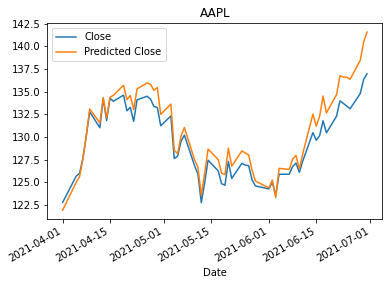

In [19]:
# Plot Results
results = y_test
results['Predicted Close'] = predictions
results.plot(title='AAPL')

In [20]:
# Calculate Root Mean Squared Error
mse = mean_squared_error(
    results['Close'],
    results['Predicted Close']
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.6272090348156776


## MSFT

In [21]:
# Set Features and Target
X = msft_1Y.drop(columns=['Close'], axis=1).copy()
y = msft_1Y['Close'].to_frame()

In [22]:
# Split Into Train and Test
X_train = X['2020-07-01':'2021-03-31'].copy()
X_test = X['2021-04-01':'2021-06-30'].copy()
y_train = y['2020-07-01':'2021-03-31'].copy()
y_test = y['2021-04-01':'2021-06-30'].copy()

In [23]:
# Create the MinMaxScaler instance
scaler = MinMaxScaler()

In [24]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [25]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Initialize model, fit model to training data, create predictions for test features
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

<AxesSubplot:title={'center':'MSFT'}, xlabel='Date'>

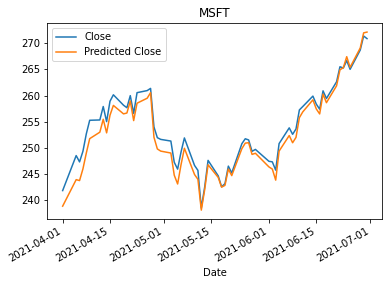

In [27]:
# Plot Results
results = y_test
results['Predicted Close'] = predictions
results.plot(title='MSFT')

In [28]:
# Calculate Root Mean Squared Error
mse = mean_squared_error(
    results['Close'],
    results['Predicted Close']
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.786302646588348


## AMZN

In [29]:
# Set Features and Target
X = amzn_1Y.drop(columns=['Close'], axis=1).copy()
y = amzn_1Y['Close'].to_frame()

In [30]:
# Split Into Train and Test
X_train = X['2020-07-01':'2021-03-31'].copy()
X_test = X['2021-04-01':'2021-06-30'].copy()
y_train = y['2020-07-01':'2021-03-31'].copy()
y_test = y['2021-04-01':'2021-06-30'].copy()

In [31]:
# Create the MinMaxScaler instance
scaler = MinMaxScaler()

In [32]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [33]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Initialize model, fit model to training data, create predictions for test features
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

<AxesSubplot:title={'center':'AMZN'}, xlabel='Date'>

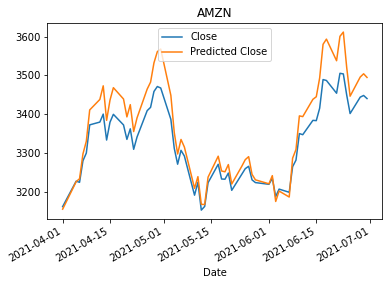

In [35]:
# Plot Results
results = y_test
results['Predicted Close'] = predictions
results.plot(title='AMZN')

In [36]:
# Calculate Root Mean Squared Error
mse = mean_squared_error(
    results['Close'],
    results['Predicted Close']
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 51.04333490186943


## UBER

In [45]:
# Set Features and Target
X = uber_1Y.drop(columns=['Close'], axis=1).copy()
y = uber_1Y['Close'].to_frame()

In [46]:
# Split Into Train and Test
X_train = X['2020-07-01':'2021-03-31'].copy()
X_test = X['2021-04-01':'2021-06-30'].copy()
y_train = y['2020-07-01':'2021-03-31'].copy()
y_test = y['2021-04-01':'2021-06-30'].copy()

In [47]:
# Create the MinMaxScaler instance
scaler = MinMaxScaler()

In [48]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [49]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
# Initialize model, fit model to training data, create predictions for test features
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

<AxesSubplot:title={'center':'UBER'}, xlabel='Date'>

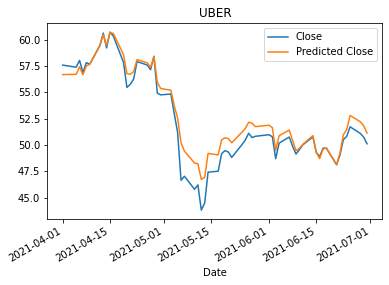

In [51]:
# Plot Results
results = y_test
results['Predicted Close'] = predictions
results.plot(title='UBER')

In [52]:
# Calculate Root Mean Squared Error
mse = mean_squared_error(
    results['Close'],
    results['Predicted Close']
)
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.1307410723734745
